# Problem statement-

 Use EDA to analyse the patterns present in the data to ensure that the applicants are capable of repaying the loan are not rejected. Understand how consumer attributes and loan attributes influence the tendency of default.

# Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Reading data

In [7]:
df = pd.read_csv('application_data.csv')

In [3]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# checking number of missing values

In [6]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
# Checking descriptive statistics

In [8]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
shape=df.shape

In [11]:
shape

(307511, 122)

In [12]:
sample=df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']]


In [13]:
sample.isna().sum()

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
dtype: int64

# percentage of missing values

In [14]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

# dropping columns with high missing values(more than 13%)
#df.dropna(thresh=df.shape[0]*0.13,how='all',axis=1)

In [15]:
to_drop=[
'OWN_CAR_AGE',
'OCCUPATION_TYPE',
'EXT_SOURCE_1',
'EXT_SOURCE_3',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [16]:
df.drop(to_drop, inplace=True, axis=1)

In [17]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

In [18]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

# checking datatype of columns

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [20]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

# checking if the column is categorical or continuous

In [21]:
for i in df.columns:
    print(df[i].value_counts())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
1.350000e+05    35750
1.125000e+05    31019
1.575000e+05    26556
1.800000e+05    24719
9.000000e+04    22483
2.250000e+05    20698
2.025000e+05    16341
6.750000e+04    11147
2.700000e+05    10827
8.100000e+04     6001
3.150000e+05     5862
2.475000e+05     5344
1.260000e+05     4668
3.600000e+05     4115
1.215000e+05     3848
9.900000e+04     3633
2.925000e+05     3418
1.035000e+05     3330
7.650000e+04     3146
1.440000e+05     3123
1.710000e+05     2647
4.500000e+05     2435
1.170000e+05     2390
5.400000e+04     2319
7.200000e+04     2187
1.665000e+05     2053
4.500000e+04     2043
1.080000e+05     1946
3.375000e+05     1790
9.450000e+04     

Name: AMT_INCOME_TOTAL, dtype: int64
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1821
360000.0     1743
508495.5     1717
592560.0     1688
497520.0     1665
405000.0     1661
835380.0     1600
337500.0     1588
679500.0     1555
942300.0     1431
314100.0     1394
152820.0     1366
1546020.0    1279
495000.0     1268
157500.0     1203
585000.0     1200
728460.0     1065
526491.0     1012
544491.0     1009
343800.0      939
1223010.0     930
312768.0      929
247275.0      920
1800000.0     900
814041.0      897
630000.0      895
490495.5      842
101880.0 

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
29970.0      643
21775.5      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689   

Name: DAYS_BIRTH, dtype: int64
 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
-207         138
-188         137
-216         137
-116         136
-196         136
-222         135
-193         134
-195         133
-214         132
-213         131
-254         131
-381         130
-201         130
-233         128
-185         128
-237         127
-194         127
-184         126
-234         126
-209         125
-348         125
-241         124
-745         123
-137         123
-139         122
-382         122
-238         122
-198         122
-240         120
-205         120
-191         120
-218         120
-223         119
-225         119
-118         119
-430         118
-227         118
-244         118
-181         118
-370         117
-132         117
-115         117
-228         117
-133         117
-268         117
-129         116
-204         116


-1.000000        113
-7.000000         98
-6.000000         96
-2.000000         92
-4.000000         92
-5.000000         86
-9.000000         84
-3.000000         84
 0.000000         80
-21.000000        80
-14.000000        80
-10.000000        79
-11.000000        67
-511.000000       66
-15.000000        66
-8.000000         65
-56.000000        65
-23.000000        64
-41.000000        63
-621.000000       63
-20.000000        62
-19.000000        62
-13.000000        62
-34.000000        62
-69.000000        62
-70.000000        62
-29.000000        61
-812.000000       61
-742.000000       61
-679.000000       61
-735.000000       61
-569.000000       60
-827.000000       60
-389.000000       60
-342.000000       60
-4606.000000      60
-42.000000        60
-630.000000       59
-542.000000       59
-923.000000       59
-47.000000        59
-393.000000       59
-889.000000       59
-251.000000       59
-434.000000       58
-490.000000       58
-300.000000       58
-371.000000  

Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64
0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64
Business Entity Type 3  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-329.0       203
-358.0       203
-293.0       202
-350.0       201
-399.0       200
-441.0       200
-404.0       199
-463.0       198
-9.0         198
-11.0        198
-301.0       197
-496.0       195
-362.0       195
-304.0       195
-483.0       195
-308.0       195
-355.0       194
-500.0       194
-391.0       193
-427.0       193
-334.0       193
-347.0       192
-448.0       192
-415.0       191
-413.0       191
-447.0       190
-546.0       190
-469.0       190
-499.0       189
-566.0       188
-353.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-511.0       185
-296.0       185
-534.0       185
-484.0       185
-454.0       185
-509.0       184
-291.0       183
-421.0       1

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64
0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64
0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64
0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64


# imputing coloumns with mean and mode

In [22]:
#integer data type
df[['AMT_GOODS_PRICE']].describe().T

count           mean           std      min       25%  \
AMT_GOODS_PRICE  307233.0  538396.207429  369446.46054  40500.0  238500.0   

                      50%       75%        max  
AMT_GOODS_PRICE  450000.0  679500.0  4050000.0

In [23]:
df[['EXT_SOURCE_2']].describe().T

count      mean      std           min       25%       50%  \
EXT_SOURCE_2  306851.0  0.514393  0.19106  8.173617e-08  0.392457  0.565961   

                   75%    max  
EXT_SOURCE_2  0.663617  0.855

# here the difference between 25th and 75th percentile & mean and median difference is significantly small. SO mean value can be used here to impute the coloumns

In [24]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(),inplace=True)

In [25]:
df['AMT_GOODS_PRICE'].isnull().sum()

0

In [26]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(),inplace=True)

In [27]:
df['EXT_SOURCE_2'].isnull().sum()

0

# NAME_TYPE_SUITE has Object datatype hence mode can be used to replace the null values

In [28]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [29]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

# AMT_ANNUITY  has object datatype as float hence medain can be used here to replace the null values

In [108]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)

In [109]:
df['AMT_ANNUITY'].describe().T

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

# Checking the Data frame for outlier values 

In [32]:
df['AMT_INCOME_TOTAL'].describe().T

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [33]:
df['AMT_CREDIT'].describe().T

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [34]:
df['AMT_ANNUITY'].describe().T

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [35]:
df['CNT_CHILDREN'].describe().T

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [36]:
df['AMT_GOODS_PRICE'].describe().T

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
df['DAYS_BIRTH'].describe().T

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [38]:
df['DAYS_ID_PUBLISH'].describe().T

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [39]:
df['DAYS_EMPLOYED'].describe().T

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [40]:
df['DAYS_REGISTRATION'].describe().T

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

# AMT_INCOME_TOTAL, CNT_CHILDREN AND DAYS_EMPLOYED etc have huge differences as compared to regualr intervals. Hence these these columns can be used to show outliers.

In [41]:
#features=['AMT_INCOME_TOTAL','CNT_CHILDREN']
#for i in enumerate(features):
#    plt.subplot(1,2,i[0]+1)
#    sns.boxplot(y=df[i[1]])
    #plt.hist(df[i[1]])

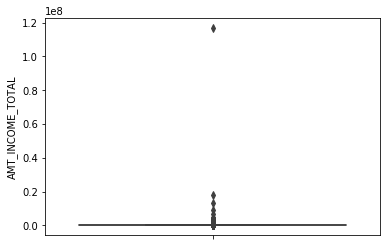

In [42]:
sns.boxplot(y=df['AMT_INCOME_TOTAL'])

# Since, maximum amount is way above the mean and 75th percentile hence are outliers present in this column.

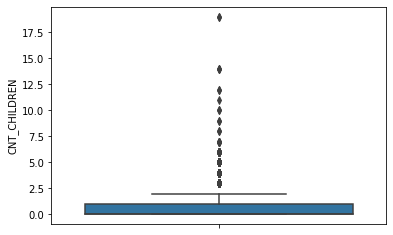

In [43]:
sns.boxplot(y=df['CNT_CHILDREN'])

# here the plot shows large number after 75th percentile. hence, it the col can be conisdered to hv outliers

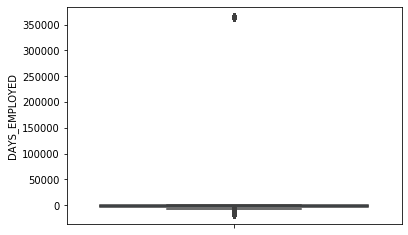

In [44]:
sns.boxplot(y=df['DAYS_EMPLOYED'])

# there is value after 350000 hence can be treated as outlier

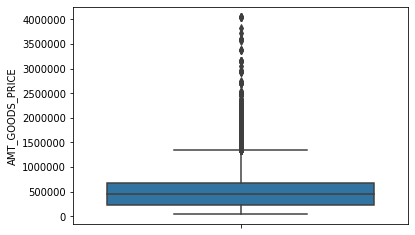

In [45]:
sns.boxplot(y=df['AMT_GOODS_PRICE'])

# here the plot shows large number after 75th percentile. hence, it the col can be conisdered to hv outliers

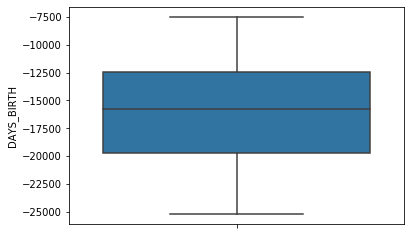

In [46]:
sns.boxplot(y=df['DAYS_BIRTH'])

# by the boxplot its clear that there are some datapoints are located outsides limits hence can be treated as having outliers

In [47]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [ ]:
Remove_Outlier_Indices(df)

# DATA ANALYSIS

In [1]:
# checking target variable distribution

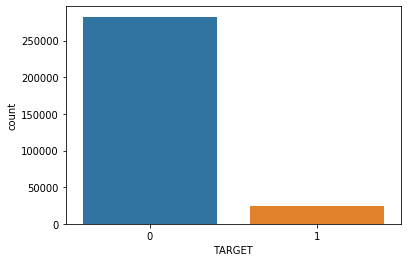

In [49]:
sns.countplot(x="TARGET", data=df)

# from the plot it is clear that there is imbalance between the target type 0 and 1 with a ratio of 91.5 : 8.45

# UNIVARIATE ANALYSIS

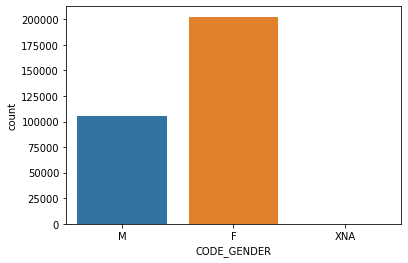

In [50]:
sns.countplot(x="CODE_GENDER", data=df)

In [51]:
pd.crosstab(index=df["TARGET"],
            columns=df["CODE_GENDER"],
            dropna=True)

CODE_GENDER       F      M  XNA
TARGET                         
0            188278  94404    4
1             14170  10655    0

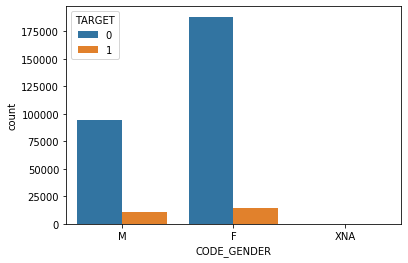

In [52]:
sns.countplot(x="CODE_GENDER",data=df, hue="TARGET")

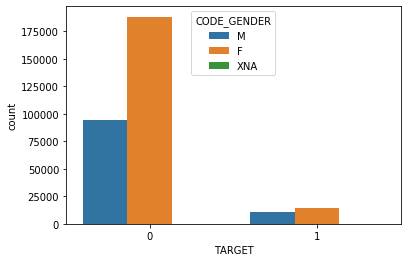

In [55]:
sns.countplot(x="TARGET", data=df,hue="CODE_GENDER")

# the plots for CODE_GENDER values against count and Target variables, shows that number of female clients is amlost double than number 0f make clients. It is seen that males have a higher chance of not returning their loans as compared to women

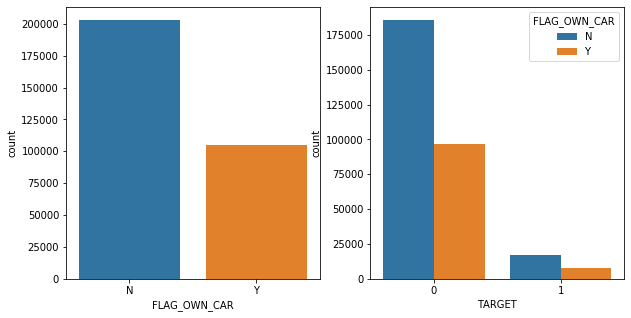

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="FLAG_OWN_CAR",data=df)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="FLAG_OWN_CAR")

# Here the client that owns car are almost half as compared to that dont own one. The clien that owns car are less probable to not repay than the other category. Both categories has non repayment rates close to 8%

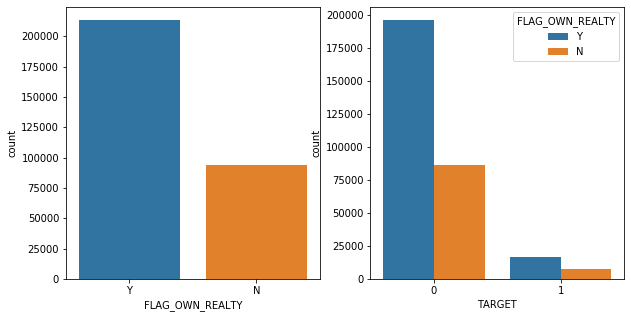

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="FLAG_OWN_REALTY",data=df)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="FLAG_OWN_REALTY")

# here the plot shows that clients who own real estate mare more than double to those who dont and both of them has non repayment rates near to eight percent

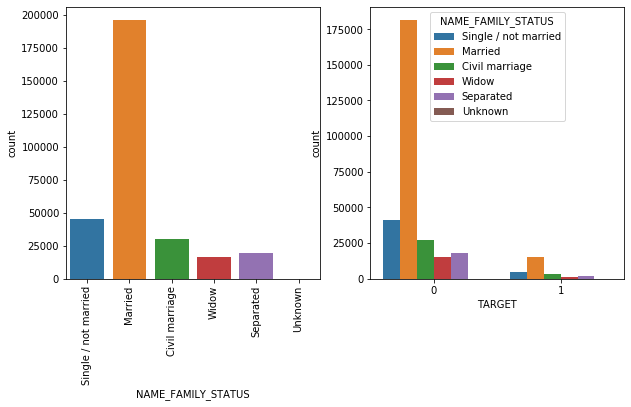

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_FAMILY_STATUS",data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="NAME_FAMILY_STATUS")

# here most of the clients are married and non repayment of civil marriage is highest and widow has the lowest value

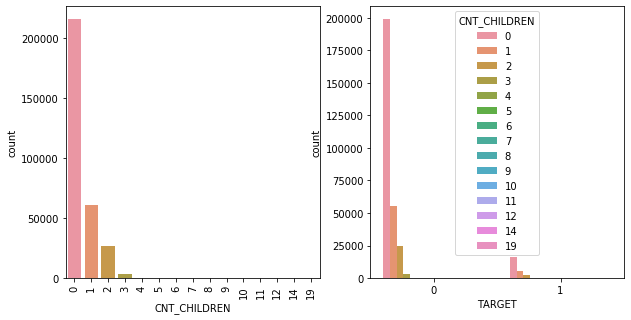

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="CNT_CHILDREN",data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="CNT_CHILDREN")

# here it can be observed that people with more childern have high chances of non replayment of loans and a large number if applicants have no children in the data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

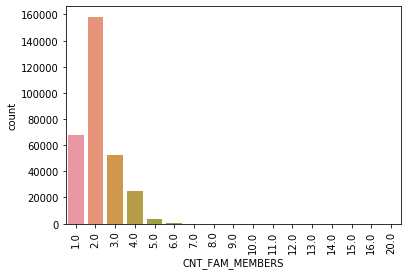

In [63]:
sns.countplot(x="CNT_FAM_MEMBERS", data=df)
plt.xticks(rotation=90)

# here it is seen that most of the applicants for loan has 2 family members in totality.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

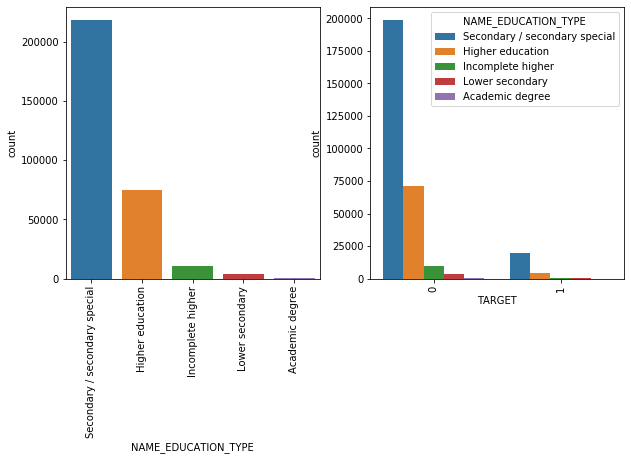

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_EDUCATION_TYPE",data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)

# here a large number of applicants have secondary education. and people with lower secondary eduction status has the highest probablity of payment related issues.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

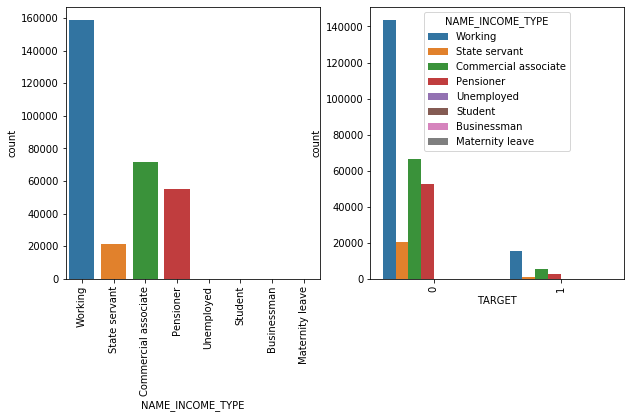

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_INCOME_TYPE",data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="NAME_INCOME_TYPE")
plt.xticks(rotation=90)

# here its seen that working and commercial assocaites have high frequency count of non repayment of loans

(array([0, 1]), <a list of 2 Text xticklabel objects>)

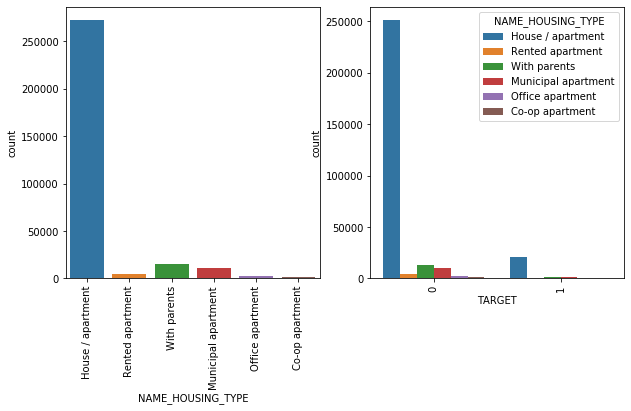

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="NAME_HOUSING_TYPE",data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x="TARGET",data=df, hue="NAME_HOUSING_TYPE")
plt.xticks(rotation=90)

# here aplicants within house category applied highest for a loan.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

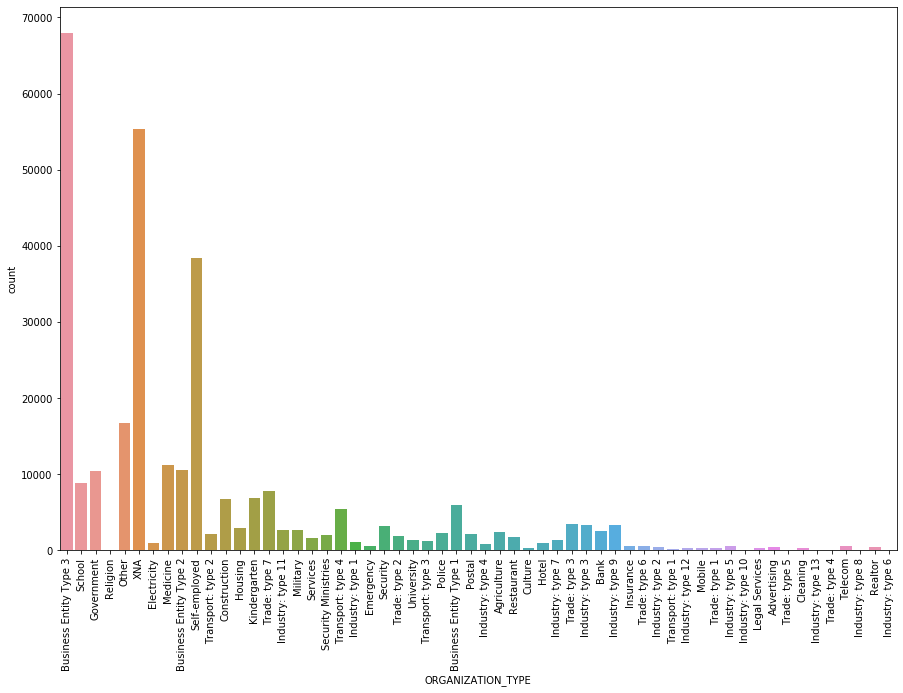

In [73]:
plt.figure(figsize=(15,10))
sns.countplot(x="ORGANIZATION_TYPE",data=df)
plt.xticks(rotation=90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

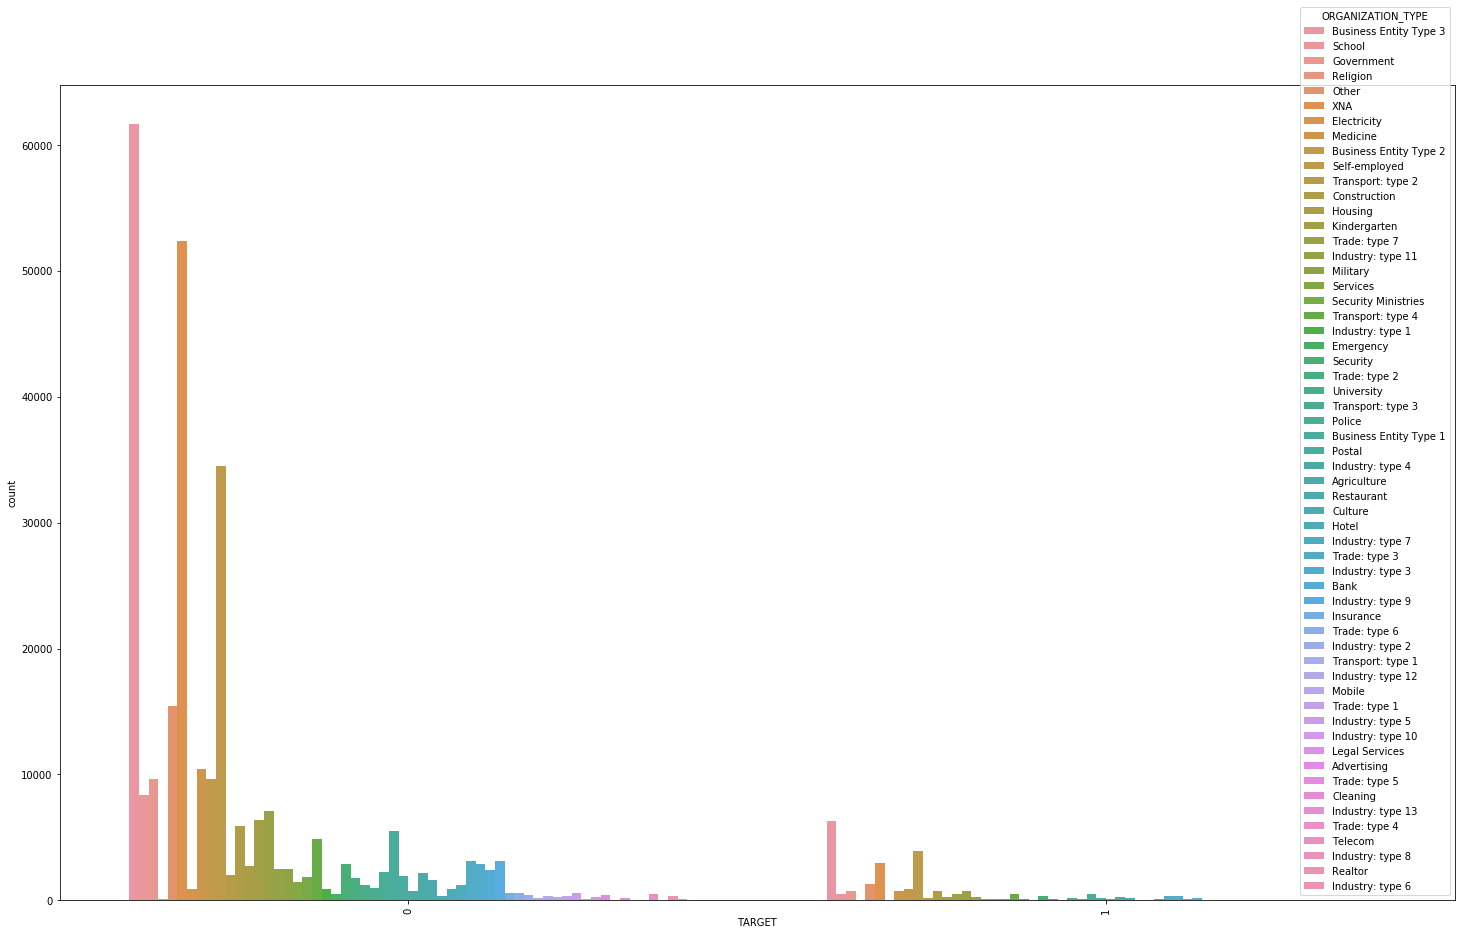

In [75]:
plt.figure(figsize=(25,15))
sns.countplot(x="TARGET",data=df, hue="ORGANIZATION_TYPE")
plt.xticks(rotation=90)

# here highest applications were from business entity type 3 but highest non repayment was from transport type 3

(array([-27500., -25000., -22500., -20000., -17500., -15000., -12500.,
        -10000.,  -7500.,  -5000.]), <a list of 10 Text xticklabel objects>)

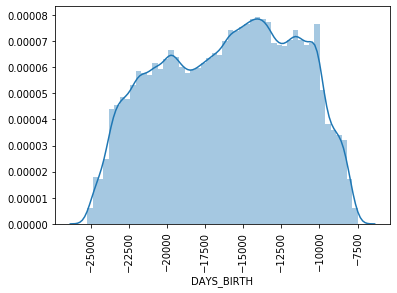

In [77]:
sns.distplot(df['DAYS_BIRTH'])
plt.xticks(rotation=90)

# FINDING HIGHEST CORRELATED COLUMNS IN THE DATA

In [95]:
df2 = df[["TARGET","AMT_ANNUITY","AMT_CREDIT","AMT_GOODS_PRICE","AMT_INCOME_TOTAL","CNT_CHILDREN","CNT_FAM_MEMBERS","DAYS_BIRTH","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","DAYS_LAST_PHONE_CHANGE","REGION_POPULATION_RELATIVE","EXT_SOURCE_2"]]
df2.head()

TARGET  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0       1      24700.5    406597.5         351000.0          202500.0   
1       0      35698.5   1293502.5        1129500.0          270000.0   
2       0       6750.0    135000.0         135000.0           67500.0   
3       0      29686.5    312682.5         297000.0          135000.0   
4       0      21865.5    513000.0         513000.0          121500.0   

   CNT_CHILDREN  CNT_FAM_MEMBERS  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
0             0              1.0       -9461                            2   
1             0              2.0      -16765                            1   
2             0              1.0      -19046                            2   
3             0              2.0      -19005                            2   
4             0              1.0      -19932                            2   

   REGION_RATING_CLIENT  DAYS_LAST_PHONE_CHANGE  REGION_POPULATION_RELATIVE  \
0                     2                 -1134.0                    0.018801   
1                     1                  -828.0                    0.003541   
2                     2                  -815.0                    0.010032   
3                     2                  -617.0                    0.008019   
4                     2                 -1106.0                    0.028663   

   EXT_SOURCE_2  
0      0.262949  
1      0.622246  
2      0.555912  
3      0.650442  
4      0.322738

In [96]:
cor = df2.corr()
round(cor, 3)

TARGET  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  \
TARGET                        1.000       -0.013      -0.030           -0.040   
AMT_ANNUITY                  -0.013        1.000       0.770            0.775   
AMT_CREDIT                   -0.030        0.770       1.000            0.987   
AMT_GOODS_PRICE              -0.040        0.775       0.987            1.000   
AMT_INCOME_TOTAL             -0.004        0.192       0.157            0.160   
CNT_CHILDREN                  0.019        0.021       0.002           -0.002   
CNT_FAM_MEMBERS               0.009        0.076       0.063            0.061   
DAYS_BIRTH                    0.078        0.009      -0.055           -0.053   
REGION_RATING_CLIENT_W_CITY   0.061       -0.142      -0.111           -0.112   
REGION_RATING_CLIENT          0.059       -0.129      -0.102           -0.104   
DAYS_LAST_PHONE_CHANGE        0.055       -0.064      -0.074           -0.076   
REGION_POPULATION_RELATIVE   -0.037        0.118       0.100            0.103   
EXT_SOURCE_2                 -0.160        0.126       0.131            0.139   

                             AMT_INCOME_TOTAL  CNT_CHILDREN  CNT_FAM_MEMBERS  \
TARGET                                 -0.004         0.019            0.009   
AMT_ANNUITY                             0.192         0.021            0.076   
AMT_CREDIT                              0.157         0.002            0.063   
AMT_GOODS_PRICE                         0.160        -0.002            0.061   
AMT_INCOME_TOTAL                        1.000         0.013            0.016   
CNT_CHILDREN                            0.013         1.000            0.879   
CNT_FAM_MEMBERS                         0.016         0.879            1.000   
DAYS_BIRTH                              0.027         0.331            0.279   
REGION_RATING_CLIENT_W_CITY            -0.092         0.025            0.031   
REGION_RATING_CLIENT                   -0.085         0.025            0.030   
DAYS_LAST_PHONE_CHANGE                 -0.019        -0.006           -0.027   
REGION_POPULATION_RELATIVE              0.075        -0.026           -0.024   
EXT_SOURCE_2                            0.061        -0.018           -0.002   

                             DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
TARGET                            0.078                        0.061   
AMT_ANNUITY                       0.009                       -0.142   
AMT_CREDIT                       -0.055                       -0.111   
AMT_GOODS_PRICE                  -0.053                       -0.112   
AMT_INCOME_TOTAL                  0.027                       -0.092   
CNT_CHILDREN                      0.331                        0.025   
CNT_FAM_MEMBERS                   0.279                        0.031   
DAYS_BIRTH                        1.000                        0.008   
REGION_RATING_CLIENT_W_CITY       0.008                        1.000   
REGION_RATING_CLIENT              0.009                        0.951   
DAYS_LAST_PHONE_CHANGE            0.083                        0.026   
REGION_POPULATION_RELATIVE       -0.030                       -0.532   
EXT_SOURCE_2                     -0.092                       -0.288   

                             REGION_RATING_CLIENT  DAYS_LAST_PHONE_CHANGE  \
TARGET                                      0.059                   0.055   
AMT_ANNUITY                                -0.129                  -0.064   
AMT_CREDIT                                 -0.102                  -0.074   
AMT_GOODS_PRICE                            -0.104                  -0.076   
AMT_INCOME_TOTAL                           -0.085                  -0.019   
CNT_CHILDREN                                0.025                  -0.006   
CNT_FAM_MEMBERS                             0.030                  -0.027   
DAYS_BIRTH                                  0.009                   0.083   
REGION_RATING_CLIENT_W_CITY                 0.951                   0.0

# BY HEATMAP

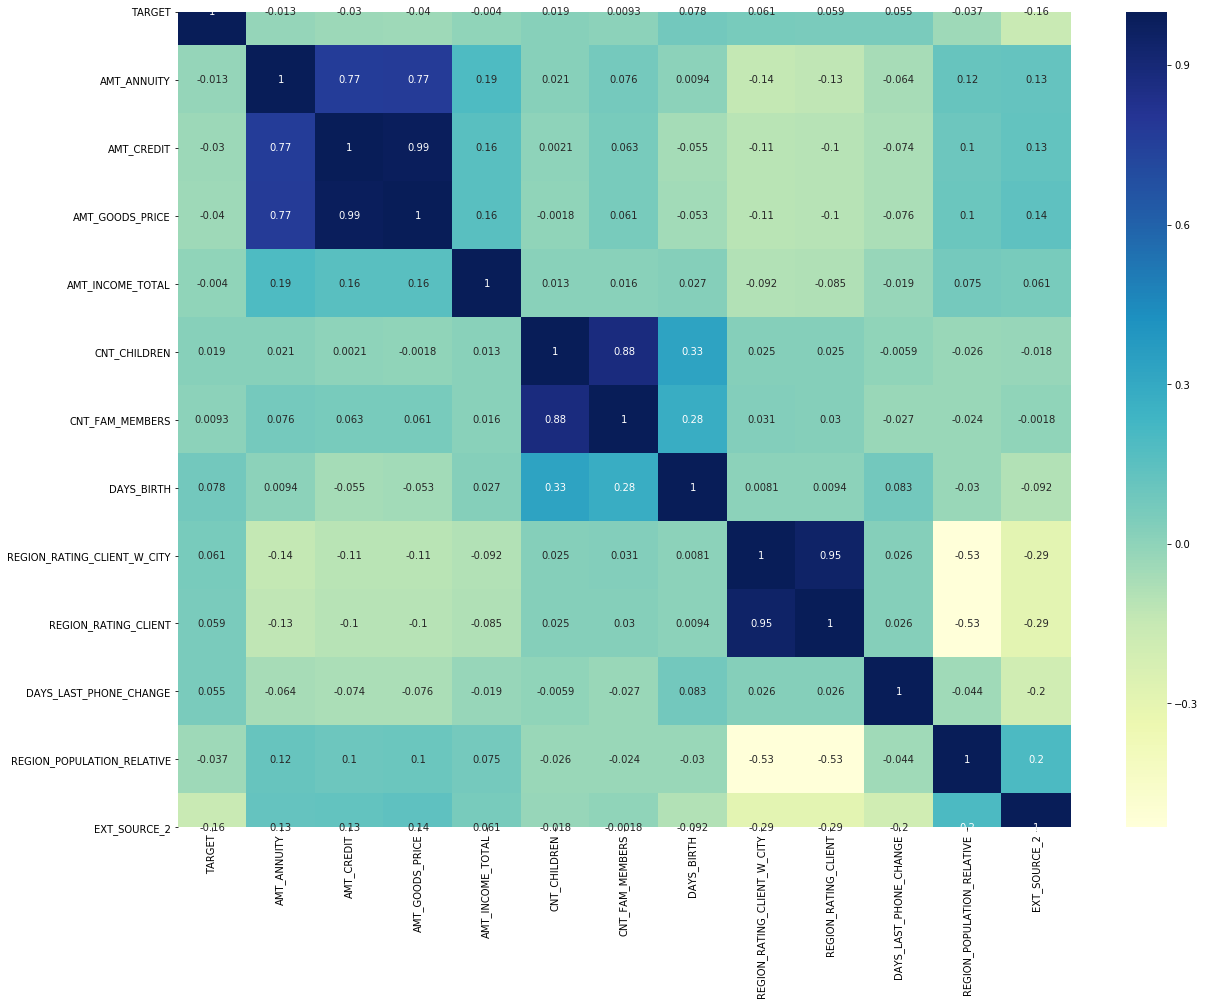

In [97]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap="YlGnBu", annot=True)

# here AMT_GOODS_PRICE, AMT_CREDIT, REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT, CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY,DAYS_BIRTH are highly correlated to targeted variable

# ********ADDING "Previous Application Dataset"**********

In [8]:
df3 = pd.read_csv('previous_application.csv')

In [9]:
df3.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [100]:
df3.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [101]:
((df3.isnull() | df3.isna()).sum() * 100 / df3.index.size).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [2]:
#dropping unnecessary columns

In [103]:
to_drop2=[
    'AMT_DOWN_PAYMENT',
    'RATE_DOWN_PAYMENT',
    'RATE_INTEREST_PRIMARY',
    'RATE_INTEREST_PRIVILEGED',
    'NAME_TYPE_SUITE',
    'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE',
    'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL'
]

In [104]:
df3.drop(to_drop2, inplace=True, axis=1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                307511 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [106]:
for i in df3.columns:
    print(df3[i].value_counts())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.000          392402
45000.000       47831
225000.000      43543
135000.000      40678
450000.000      38905
90000.000       29367
180000.000      24738
270000.000      20573
675000.000      20227
67500.000       16861
900000.000      15556
112500.000      14378
315000.000      11920
229500.000      10756
337500.000      10539
360000.000      10284
157500.000      10222
1350000.000      8434
202500.000       7943
247500.000       7175
454500.000       7039
1129500.000      6928
540000.000       6843
1125000.000      6390
405000.000       5876
765000.000       5109
585000.000       4763
292500.000       3786
495000.000       3749
810000.000       3487
630000.000       2868
720000.000       2753
31455.000        2569
22455.000        2545
1800000.000      2531
382500.000       2486
44955.000        2350
26955.000        2333
472500.000       2301
184500.000       2225
62955.000        2224
35955.000        2219
1354500.000      2159
679500.000       2130
2250000.000      2032
1215000.00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   4

Name: NAME_PAYMENT_TYPE, dtype: int64
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64
XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism   

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.

In [107]:
df3['AMT_ANNUITY'].fillna(df3['AMT_ANNUITY'].median(), inplace=True)

In [110]:
df['AMT_ANNUITY'].describe().T

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [115]:

df3['AMT_GOODS_PRICE'].fillna(df3['AMT_GOODS_PRICE'].median(), inplace=True)

In [116]:
df['AMT_GOODS_PRICE'].describe().T

count    3.075110e+05
mean     5.383962e+05
std      3.692794e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [117]:
df3['AMT_GOODS_PRICE'].isnull().sum()

0

# Merging the datasets Application and previous on SK_ID_CURR by inner join

In [123]:
#df3['SK_ID_CURR'].value_counts()

In [122]:
df3[df3.duplicated(keep=False)]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION]
Index: []

In [124]:
merged_inner = pd.merge(left=df,right=df3, left_on='SK_ID_CURR', right_on='SK_ID_CURR')
#merged_inner

# Checking contract status

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

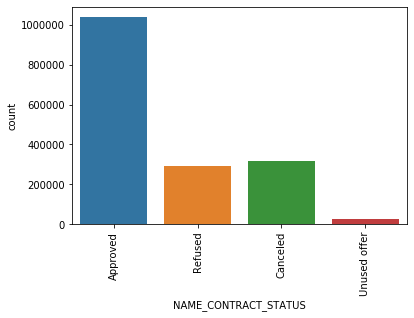

In [10]:

sns.countplot(x="NAME_CONTRACT_STATUS",data=df3)
plt.xticks(rotation=90)

# Checking client types

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

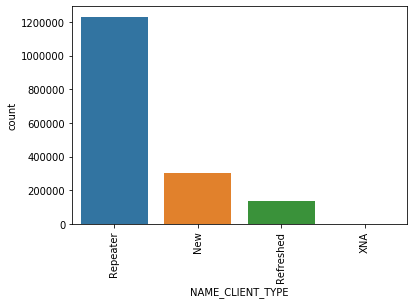

In [11]:
sns.countplot(x="NAME_CLIENT_TYPE",data=df3)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

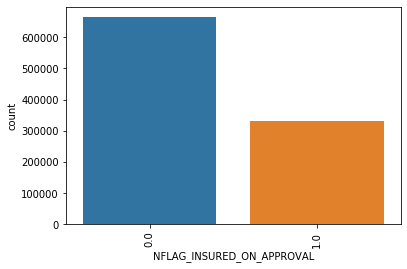

In [12]:

sns.countplot(x="NFLAG_INSURED_ON_APPROVAL",data=df3)
plt.xticks(rotation=90)

# Checking processing distribution

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

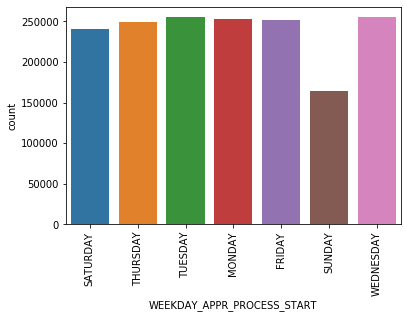

In [13]:

sns.countplot(x="WEEKDAY_APPR_PROCESS_START",data=df3)
plt.xticks(rotation=90)